In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, Normalize
from matplotlib import cm

In [9]:
df = pd.read_csv('facies_vectors.csv')

In [10]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [11]:
df['Formation'] = df['Formation'].astype('category')
df['Well Name'] = df['Well Name'].astype('category')

In [12]:
df1 = df.dropna()

In [13]:
df2 = df1[df1['Well Name'] != 'Recruit F9']

In [14]:
df2

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [15]:
df2.value_counts()

Facies  Formation  Well Name        Depth   GR       ILD_log10  DeltaPHI  PHIND   PE     NM_M  RELPOS
8       B5 LM      SHRIMPLIN        2944.0  234.800  0.515      4.700     11.410  4.800  2     0.400     2
1       A1 SH      CHURCHMAN BIBLE  2922.0  74.250   0.687      3.621     17.961  2.557  1     0.550     1
6       A1 LM      NOLAN            2884.0  67.813   0.487      5.048     12.872  3.441  2     0.707     1
                   NEWBY            2875.0  60.750   0.710      0.800     10.600  3.300  2     0.329     1
                                    2883.5  54.200   0.856      2.700     5.450   4.500  2     0.122     1
                                                                                                        ..
3       A1 SH      SHRIMPLIN        2794.5  86.100   0.655      13.900    13.115  3.500  1     0.936     1
                                    2795.0  74.580   0.647      13.500    13.300  3.400  1     0.915     1
                                    2795.5

In [16]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

well_log_data = df2

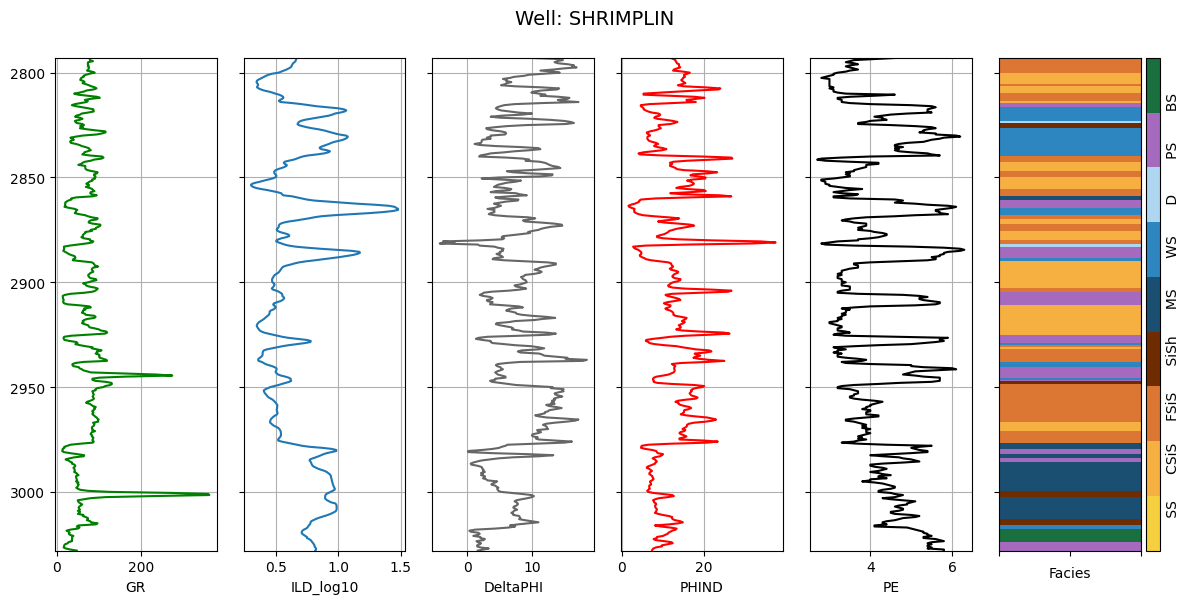

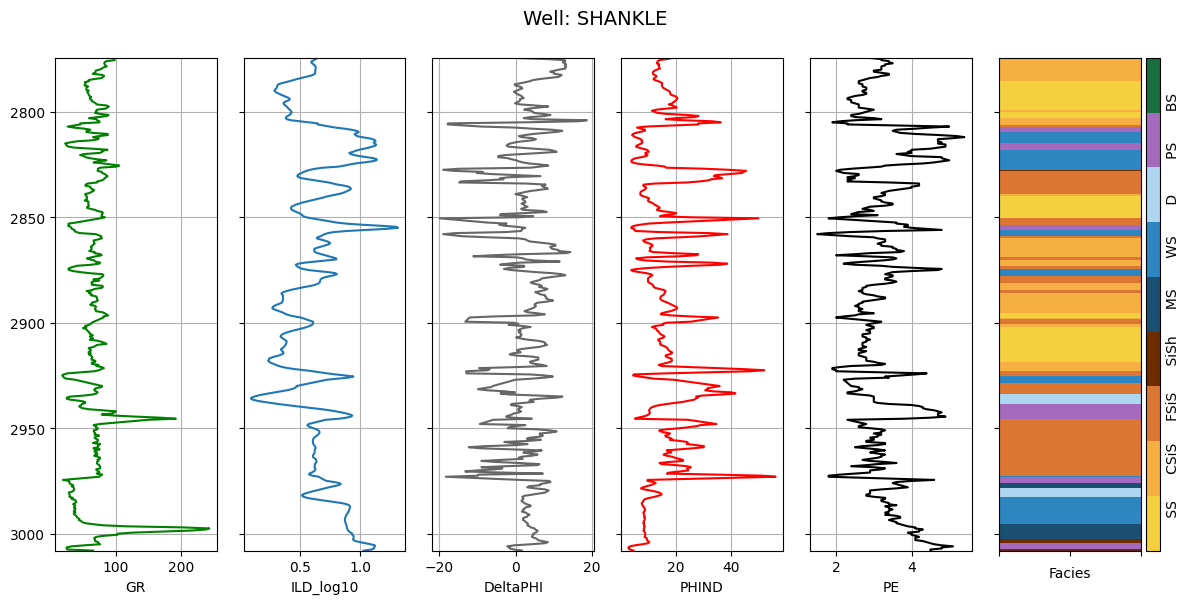

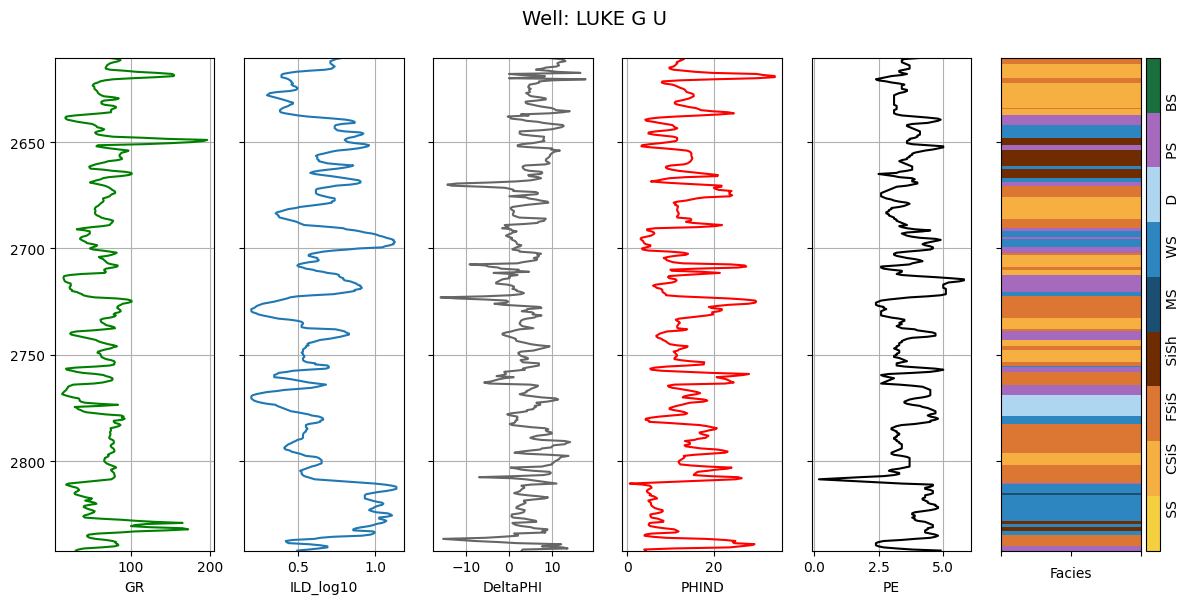

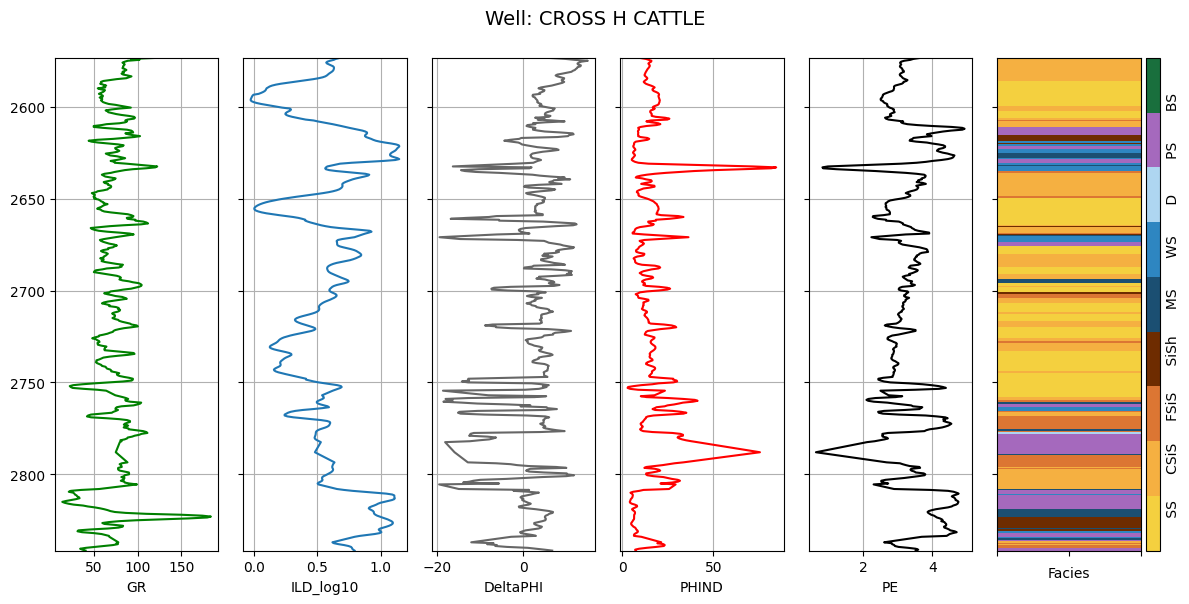

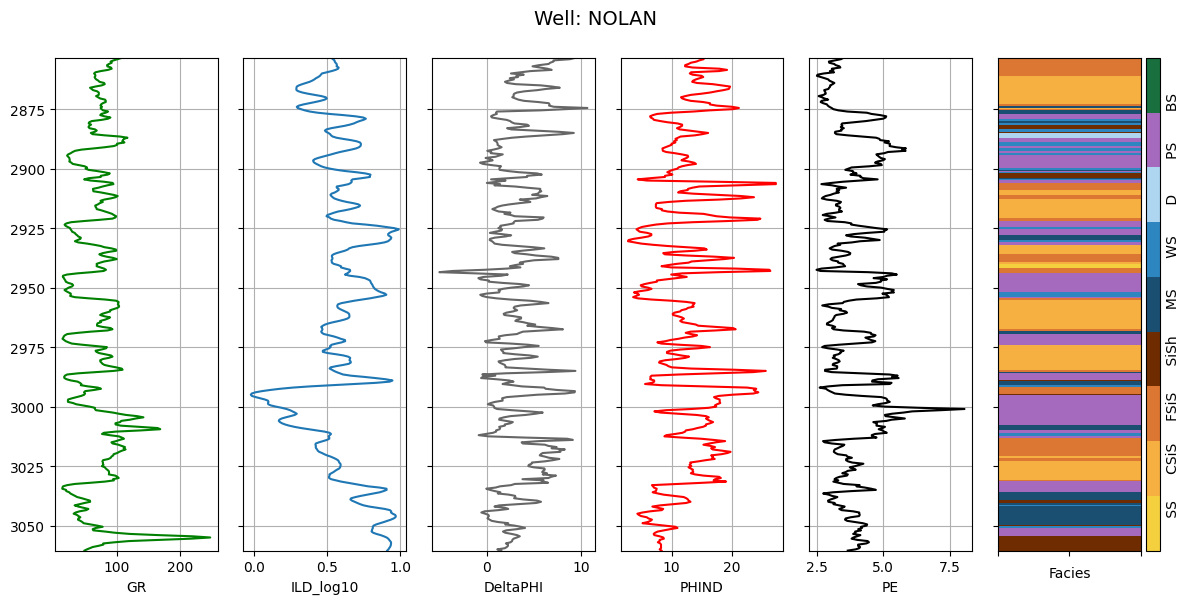

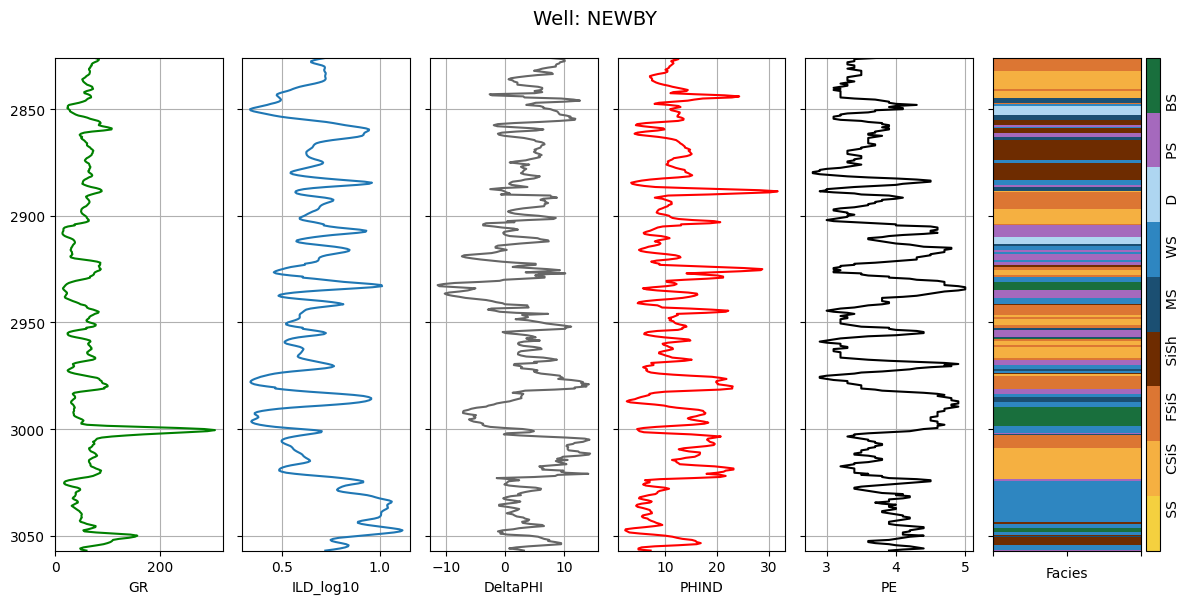

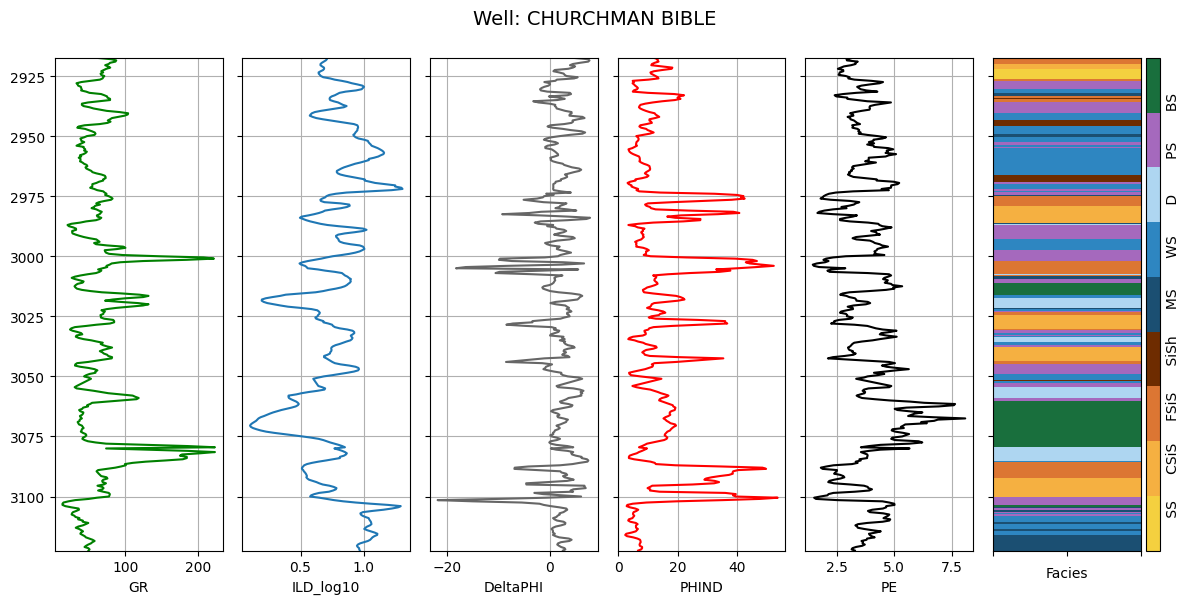

In [17]:
def make_facies_log_plots(well_log_data, facies_colors):
    unique_wells = well_log_data['Well Name'].unique()
    
    for well_name in unique_wells:
        logs = well_log_data[well_log_data['Well Name'] == well_name]
        logs = logs.sort_values(by='Depth')
        
        cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')

        ztop = logs.Depth.min()
        zbot = logs.Depth.max()

        cluster = np.repeat(np.expand_dims(logs['Facies'].values, 1), 100, 1)

        fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))

        axs[0].plot(logs.GR, logs.Depth, '-g')
        axs[1].plot(logs.ILD_log10, logs.Depth, '-')
        axs[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.40')
        axs[3].plot(logs.PHIND, logs.Depth, '-', color='r')
        axs[4].plot(logs.PE, logs.Depth, '-', color='black')

        im = axs[5].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto', extent=[0, 1, zbot, ztop], vmin=1, vmax=9)

        divider = make_axes_locatable(axs[5])
        cax = divider.append_axes("right", size="10%", pad=0.05)
        cbar = plt.colorbar(im, cax=cax)
        cbar.set_ticks([])
        cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', ' SiSh', ' MS ', ' WS ', ' D  ', ' PS ', ' BS ']))
        

        for i in range(len(axs)-1):
            
            axs[i].set_ylim(ztop, zbot)
            axs[i].invert_yaxis()
            axs[i].grid()
            axs[i].locator_params(axis='x', nbins=3)
            axs[i].set_xlabel(logs.columns[i+4])  # Assuming the first two columns are non-log well_log_data

        
        axs[5].set_xlabel('Facies')
        axs[1].set_yticklabels([]); axs[2].set_yticklabels([]); axs[3].set_yticklabels([])
        axs[4].set_yticklabels([]); axs[5].set_yticklabels([])
        axs[5].set_xticklabels([])
        fig.suptitle('Well: %s' % well_name, fontsize=14, y=1)
        plt.tight_layout()
        plt.show()

make_facies_log_plots(well_log_data, facies_colors)


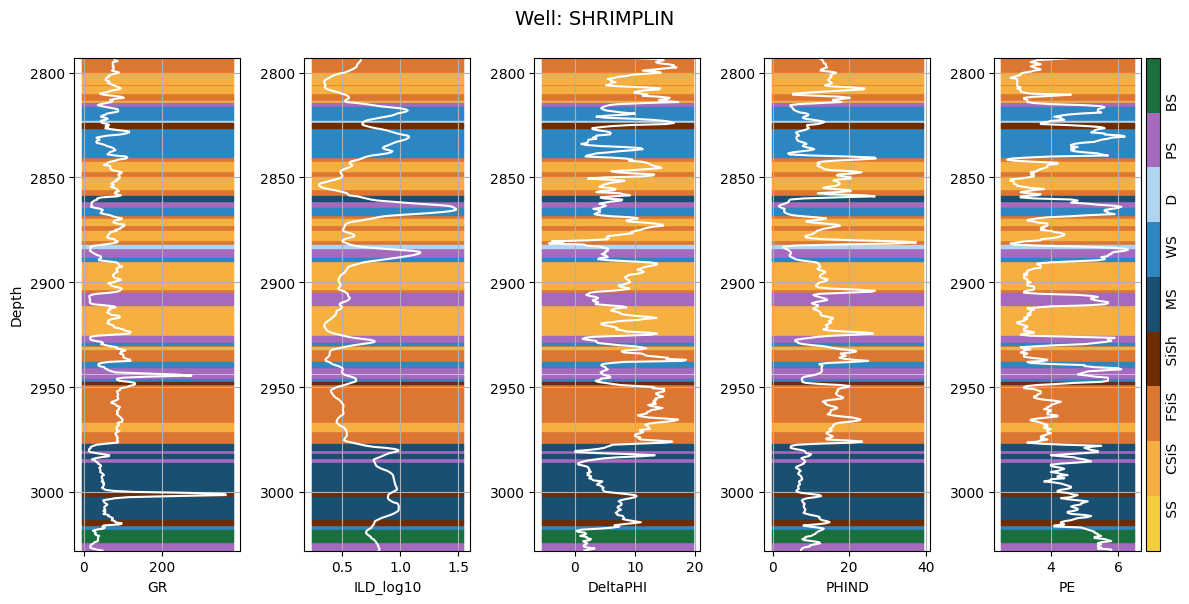

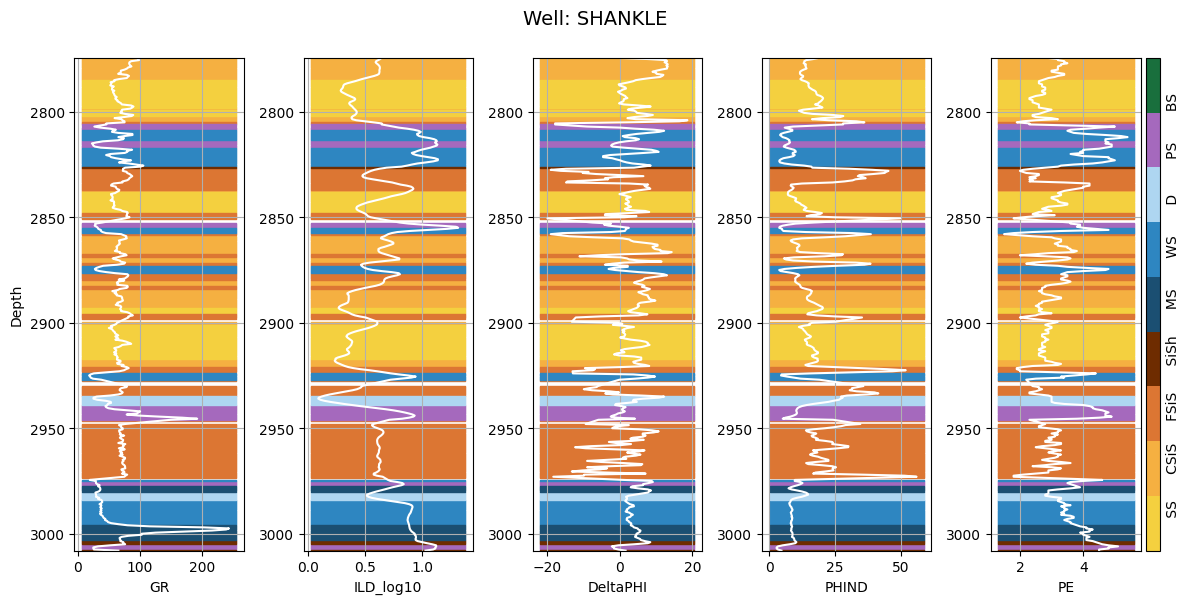

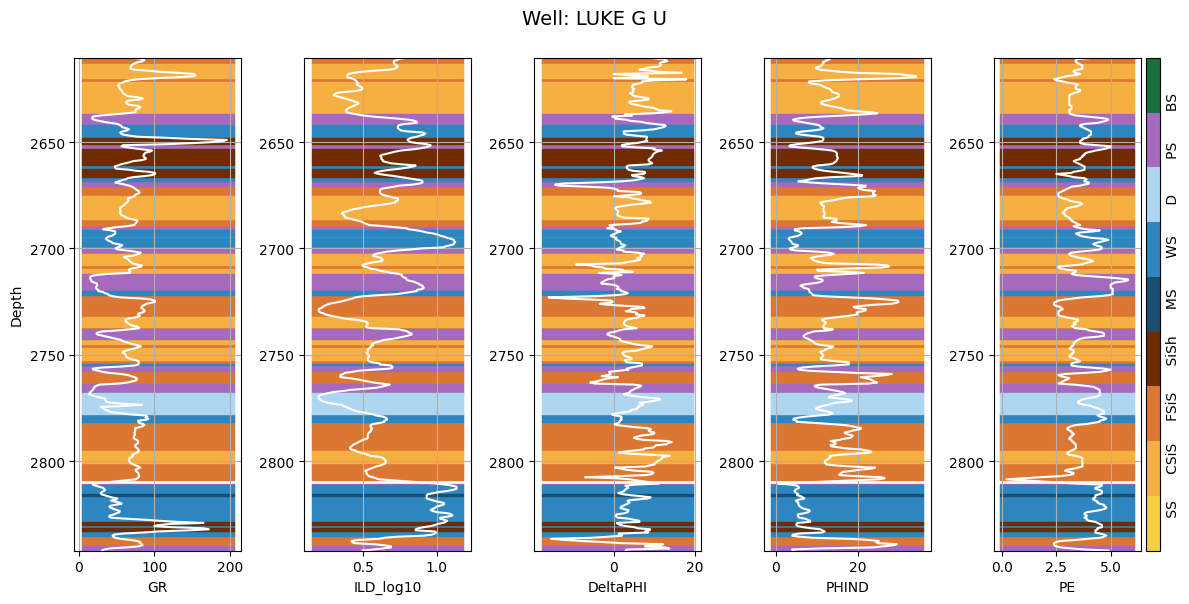

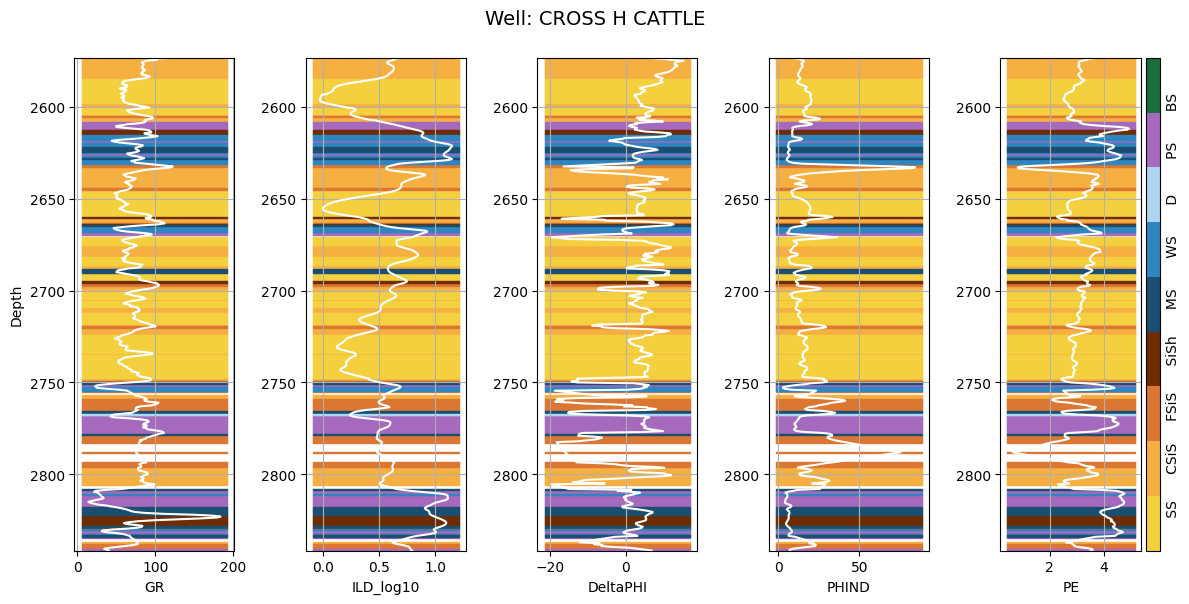

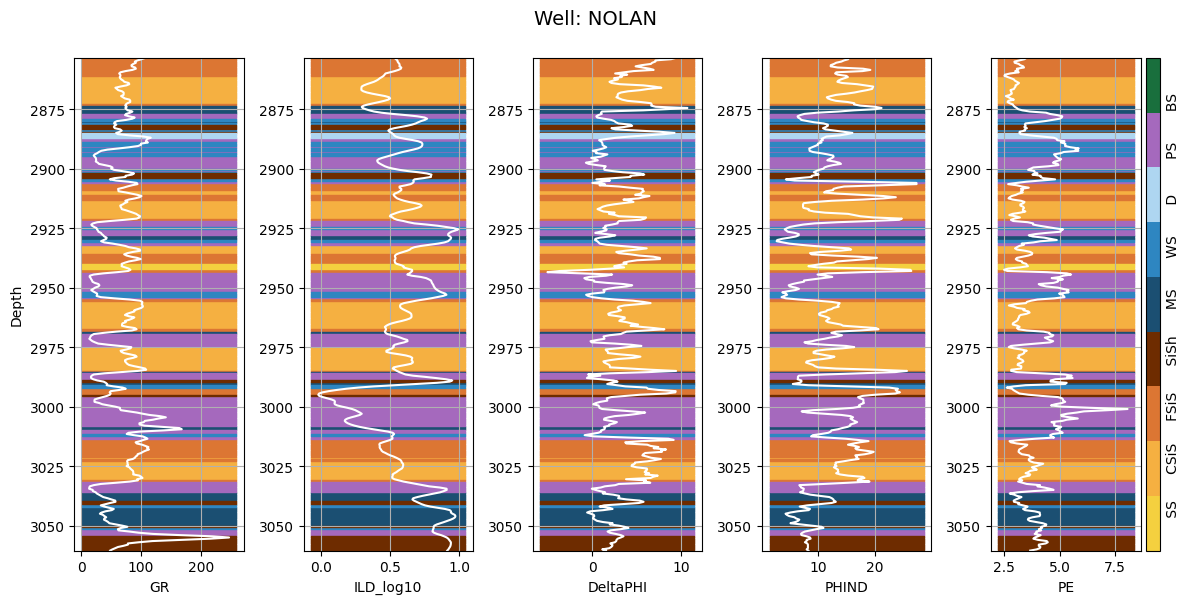

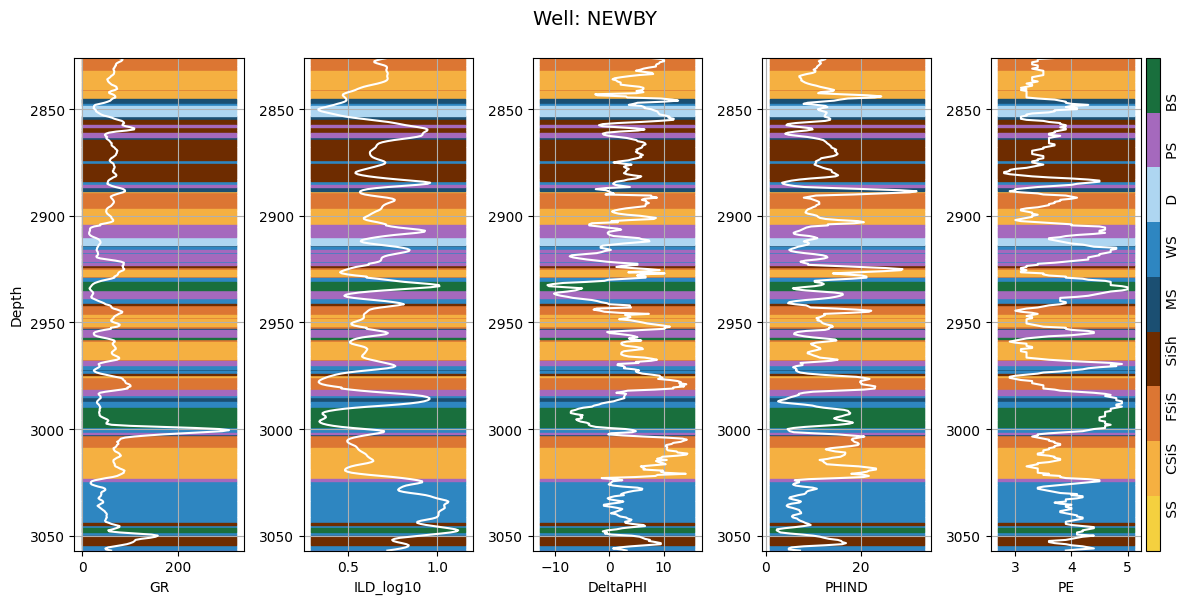

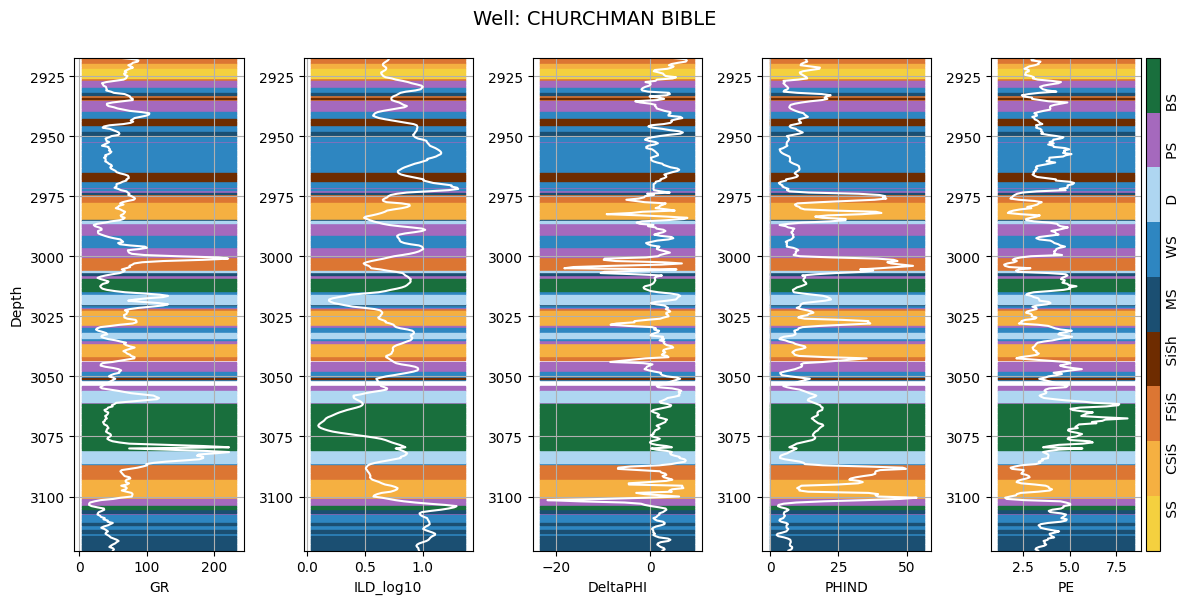

In [18]:
def make_facies_log_plots(well_log_data):
    unique_wells = well_log_data['Well Name'].unique()

    facies_labels = [' SS ', 'CSiS', 'FSiS', ' SiSh', ' MS ', ' WS ', ' D  ', ' PS ', ' BS ']

    cmap = ListedColormap(facies_colors, 'indexed')

    label_color_map = {label: color for label, color in zip(facies_labels, facies_colors)}

    for well_name in unique_wells:
        logs = well_log_data[well_log_data['Well Name'] == well_name]
        logs = logs.sort_values(by='Depth')

        facies_names = dict(zip(logs['Facies'].unique(), cmap(Normalize(vmin=1, vmax=9)(logs['Facies'].unique()))))

        fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 6))

        for i, column in enumerate(['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']):
            axs[i].plot(logs[column], logs.Depth, '-', color='white')
            axs[i].set_xlabel(column)
            axs[i].set_ylim(logs.Depth.min(), logs.Depth.max())

            xlim = axs[i].get_xlim()

            # Loop through facies and assign unique colors to fill areas between facies
            for facies_name, color in facies_names.items():
                facies_logs = logs[logs['Facies'] == facies_name]
                for index, row in facies_logs.iterrows():
                    axs[i].fill_betweenx([row['Depth'], row['Depth'] + 0.5], *xlim, color=color, interpolate=True)

            axs[i].grid()
            axs[i].locator_params(axis='x', nbins=3)
            axs[i].invert_yaxis()

        axs[0].set_ylabel('Depth')

        # Create a ScalarMappable object for the facies colors
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=9))
        sm.set_array([])

        # Add this line to create the color bar
        divider = make_axes_locatable(axs[4])  # Use axs[4] to access the 5th subplot
        cax = divider.append_axes("right", size="10%", pad=0.05)
        cbar = plt.colorbar(sm, cax=cax)
        cbar.set_ticks([])
        cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', ' SiSh', ' MS ', ' WS ', ' D  ', ' PS ', ' BS ']))# Set the label for the color bar

        fig.suptitle('Well: %s' % well_name, fontsize=14, y=1)
        plt.tight_layout()
        plt.show()

# Call the function to create the facies log plots
make_facies_log_plots(well_log_data)


In [19]:
facies_labels = [' SS ', 'CSiS', 'FSiS', ' SiSh', ' MS ', ' WS ', ' D  ', ' PS ', ' BS ']

In [21]:
facies_cmp = {}
for ind, label in enumerate(facies_labels):
    facies_cmp[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
well_log_data.loc[:,'Facies Labels'] = well_log_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [22]:
facies_counts = well_log_data['Facies Labels'].value_counts().sort_index().reset_index()

In [23]:
facies_counts

,Facies Labels,count
0,BS,93
1,D,98
2,MS,217
3,PS,498
4,SS,259
5,SiSh,184
6,WS,462
7,CSiS,738
8,FSiS,615


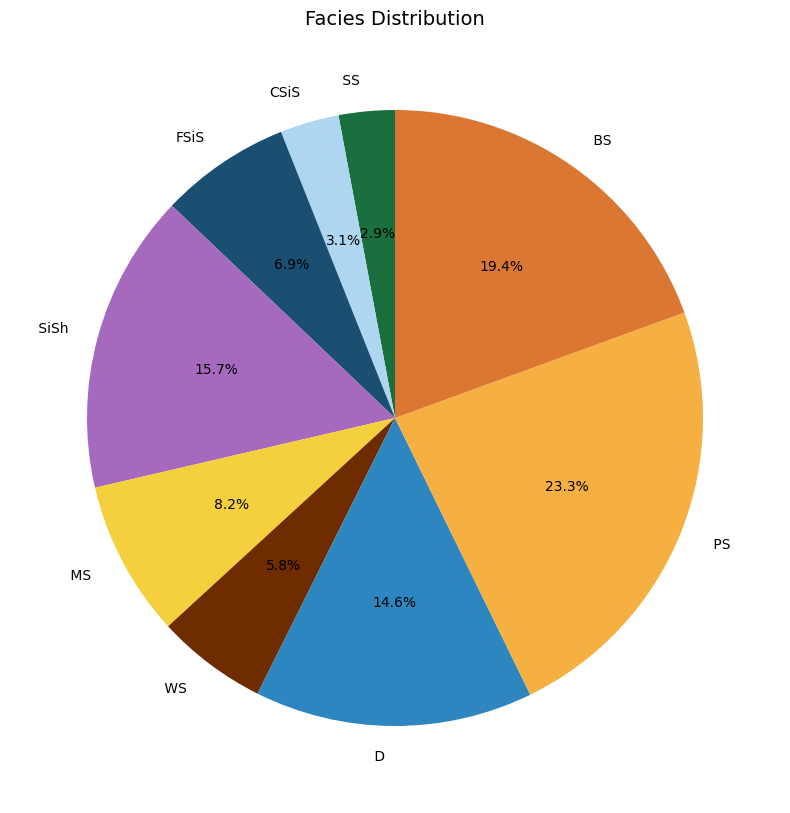

In [24]:
plt.figure(figsize=(10, 10))
plt.pie(facies_counts['count'], labels=facies_labels, colors=[facies_cmp[x] for x in facies_counts['Facies Labels']], autopct='%1.1f%%',  startangle=90)
plt.title('Facies Distribution', fontsize=14)
plt.show()


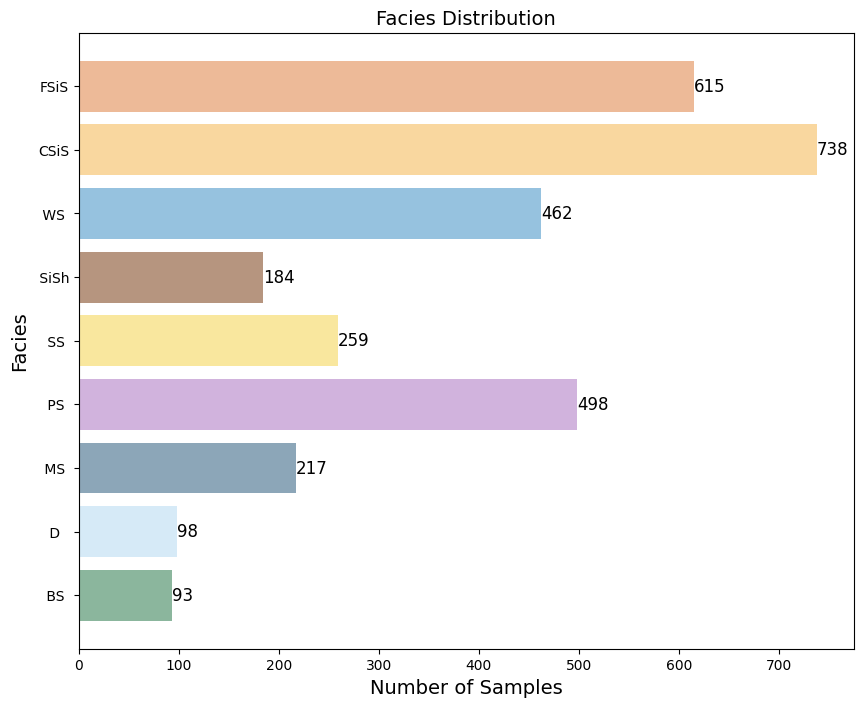

In [25]:
plt.figure(figsize=(10, 8))
ax = plt.barh(facies_counts['Facies Labels'], facies_counts['count'], color=[facies_cmp[x] for x in facies_counts['Facies Labels']], align='center', alpha=0.5)
plt.xlabel('Number of Samples', fontsize=14)
plt.ylabel('Facies', fontsize=14)
plt.title('Facies Distribution', fontsize=14)

plt.bar_label(ax, labels=facies_counts['count'], label_type='edge', fontsize=12)

plt.show()


In [26]:
well_pair = df1.drop(['Formation', 'Well Name'], axis=1)

In [27]:
numeric_well = well_pair.select_dtypes(include=[np.number])

well_corr = numeric_well.corr()
print(well_corr)

             Facies     Depth        GR  ILD_log10  DeltaPHI     PHIND  \
Facies     1.000000  0.340162 -0.344344   0.394493 -0.234064 -0.355905   
Depth      0.340162  1.000000 -0.064096   0.178039 -0.091391 -0.074373   
GR        -0.344344 -0.064096  1.000000  -0.155553  0.189977  0.248270   
ILD_log10  0.394493  0.178039 -0.155553   1.000000 -0.117604 -0.522917   
DeltaPHI  -0.234064 -0.091391  0.189977  -0.117604  1.000000 -0.250211   
PHIND     -0.355905 -0.074373  0.248270  -0.522917 -0.250211  1.000000   
PE         0.704231  0.277577 -0.289023   0.384589  0.011489 -0.573418   
NM_M       0.854654  0.297085 -0.281066   0.519251 -0.173999 -0.488403   
RELPOS     0.068525  0.001386 -0.173466   0.087962  0.036579 -0.034540   

                 PE      NM_M    RELPOS  
Facies     0.704231  0.854654  0.068525  
Depth      0.277577  0.297085  0.001386  
GR        -0.289023 -0.281066 -0.173466  
ILD_log10  0.384589  0.519251  0.087962  
DeltaPHI   0.011489 -0.173999  0.036579  
PHIND  

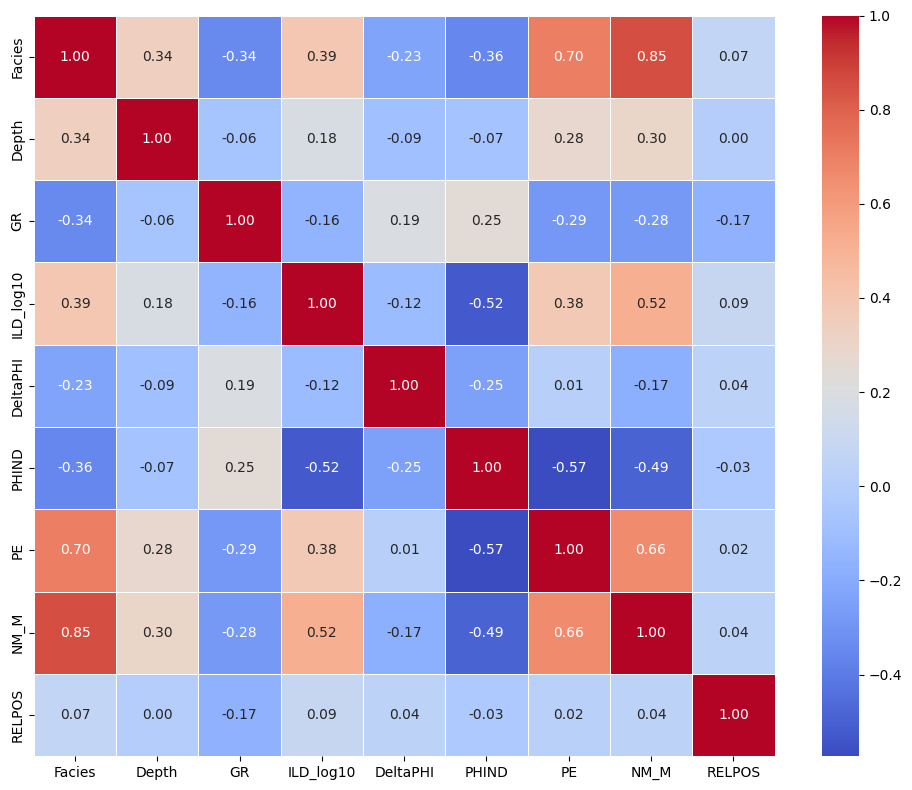

In [28]:
%matplotlib inline

plt.figure(figsize=(10, 8))
sns.heatmap(well_corr, annot=True, fmt=".2f", square=True, cmap='coolwarm', linewidths=0.5, annot_kws={'size': 10})
plt.tight_layout()
plt.show()

In [29]:
well_corr

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,0.340162,-0.344344,0.394493,-0.234064,-0.355905,0.704231,0.854654,0.068525
Depth,0.340162,1.000000,-0.064096,0.178039,-0.091391,-0.074373,0.277577,0.297085,0.001386
GR,-0.344344,-0.064096,1.000000,-0.155553,0.189977,0.248270,-0.289023,-0.281066,-0.173466
ILD_log10,0.394493,0.178039,-0.155553,1.000000,-0.117604,-0.522917,0.384589,0.519251,0.087962
DeltaPHI,-0.234064,-0.091391,0.189977,-0.117604,1.000000,-0.250211,0.011489,-0.173999,0.036579
PHIND,-0.355905,-0.074373,0.248270,-0.522917,-0.250211,1.000000,-0.573418,-0.488403,-0.034540
PE,0.704231,0.277577,-0.289023,0.384589,0.011489,-0.573418,1.000000,0.657089,0.018905
NM_M,0.854654,0.297085,-0.281066,0.519251,-0.173999,-0.488403,0.657089,1.000000,0.036607
RELPOS,0.068525,0.001386,-0.173466,0.087962,0.036579,-0.034540,0.018905,0.036607,1.000000


In [30]:
well_corr.style.background_gradient(cmap='coolwarm')

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,0.340162,-0.344344,0.394493,-0.234064,-0.355905,0.704231,0.854654,0.068525
Depth,0.340162,1.000000,-0.064096,0.178039,-0.091391,-0.074373,0.277577,0.297085,0.001386
GR,-0.344344,-0.064096,1.000000,-0.155553,0.189977,0.248270,-0.289023,-0.281066,-0.173466
ILD_log10,0.394493,0.178039,-0.155553,1.000000,-0.117604,-0.522917,0.384589,0.519251,0.087962
DeltaPHI,-0.234064,-0.091391,0.189977,-0.117604,1.000000,-0.250211,0.011489,-0.173999,0.036579
PHIND,-0.355905,-0.074373,0.248270,-0.522917,-0.250211,1.000000,-0.573418,-0.488403,-0.034540
PE,0.704231,0.277577,-0.289023,0.384589,0.011489,-0.573418,1.000000,0.657089,0.018905
NM_M,0.854654,0.297085,-0.281066,0.519251,-0.173999,-0.488403,0.657089,1.000000,0.036607
RELPOS,0.068525,0.001386,-0.173466,0.087962,0.036579,-0.034540,0.018905,0.036607,1.000000


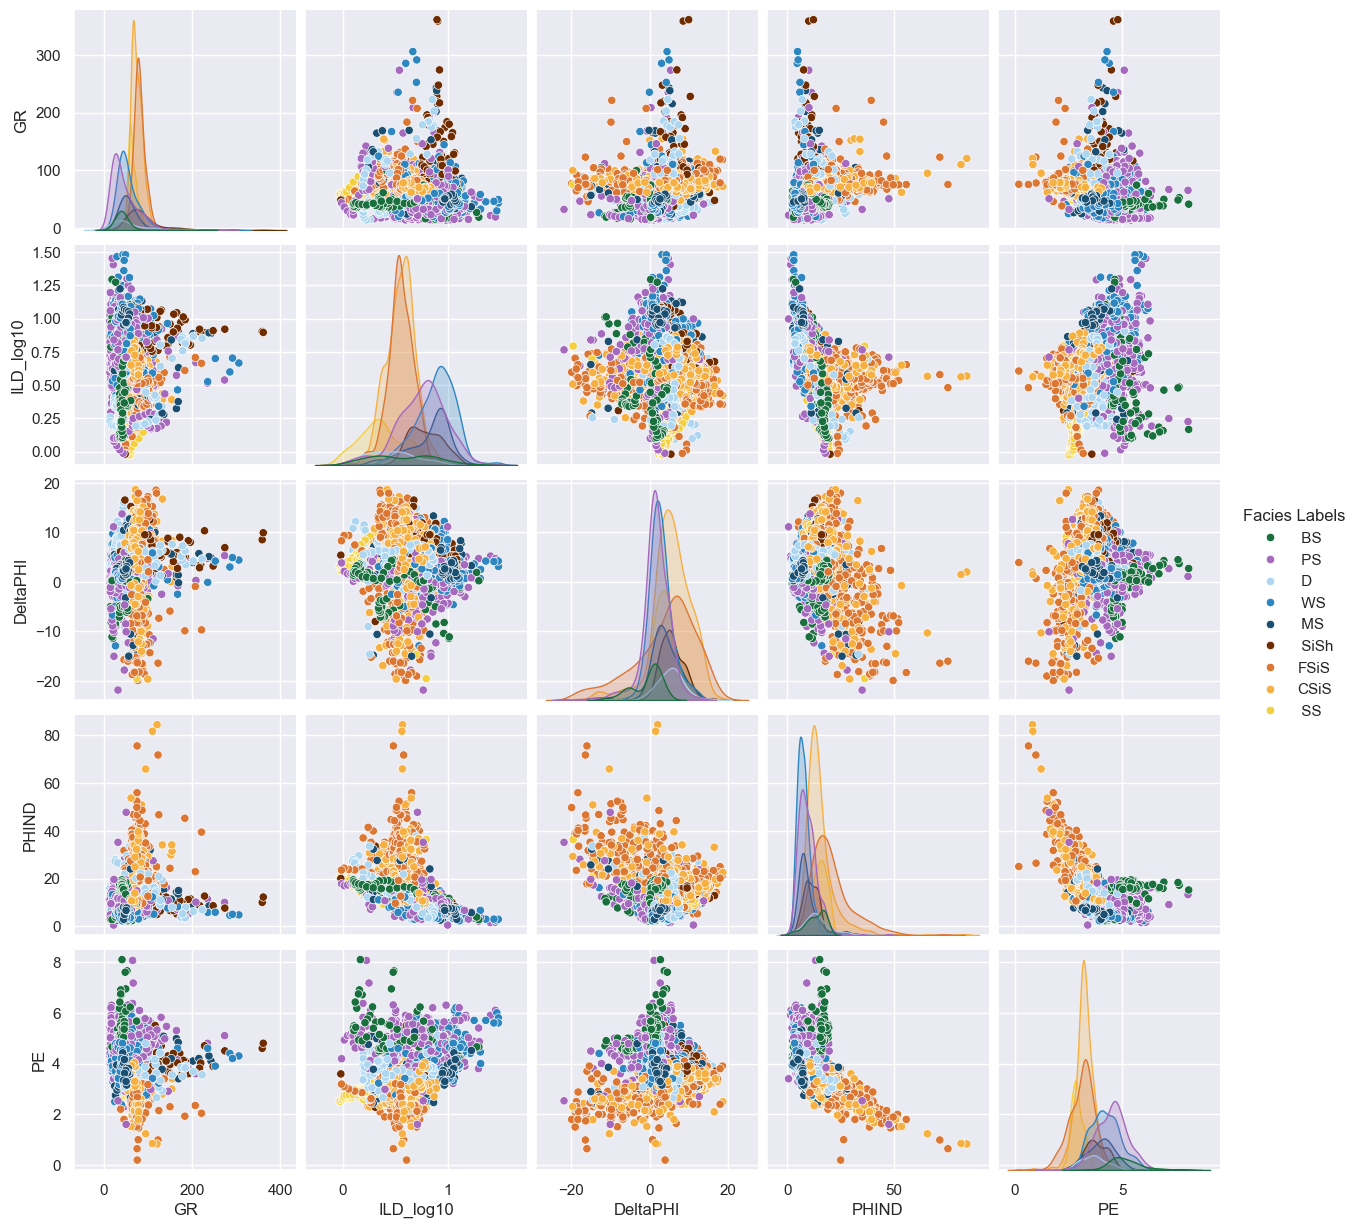

In [31]:
sns.set()
sns.pairplot(well_log_data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='Facies Labels', palette=facies_cmp,
             hue_order=list(reversed(facies_labels)))


In [50]:
well_test = well_log_data[well_log_data['Well Name'] == 'NOLAN']
well_train = well_log_data[well_log_data['Well Name'] != 'NOLAN']

In [51]:
correct_fac_labels = well_train['Facies'].values

In [52]:
well_train.shape

(2749, 12)

In [53]:
feature_vectors = well_train.drop(['Facies', 'Formation', 'Well Name', 'Facies Labels', 'Depth'], axis = 1)

In [77]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
correct_fac_labels_encoded = label_encoder.fit_transform(correct_fac_labels)

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, correct_fac_labels_encoded, test_size = 0.2, random_state = 10)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix, classification_report
#from classification_utilities import display_cm, display_adj_cm

rf_model = RandomForestClassifier(max_depth = 24, n_estimators = 128, max_features=9)

rf_model.fit(X_train, y_train)

yhat_rf = rf_model.predict(X_test)

jRF = jaccard_score(y_test, yhat_rf, average='weighted')
f1RF = f1_score(y_test, yhat_rf, average='weighted')

print("Random Forest Jaccard index: %.2f" % jRF)
print("Random Forest F1-score: %.2f" % f1RF)

rf_class_report = classification_report(y_test, yhat_rf, target_names=facies_labels)
print(f'Classification report for Random Forest:\n{rf_class_report}')

Random Forest Jaccard index: 0.60
Random Forest F1-score: 0.75
Classification report for Random Forest:
              precision    recall  f1-score   support

         SS        0.92      0.66      0.77        53
        CSiS       0.74      0.81      0.78       133
        FSiS       0.78      0.80      0.79       117
        SiSh       0.83      0.71      0.77        35
         MS        0.54      0.52      0.53        29
         WS        0.70      0.79      0.74        82
         D         0.75      0.92      0.83        13
         PS        0.70      0.62      0.66        72
         BS        0.81      0.81      0.81        16

    accuracy                           0.75       550
   macro avg       0.75      0.74      0.74       550
weighted avg       0.75      0.75      0.75       550



In [87]:
from sklearn import svm

svm_model = svm.SVC(C=10, gamma=1)

svm_model.fit(X_train, y_train)

yhat_svm = svm_model.predict(X_test)

jSVM = jaccard_score(y_test, yhat_svm, average='weighted')
f1SVM = f1_score(y_test, yhat_svm, average='weighted')

print("SVM Jaccard index: %.2f" % jSVM)
print("SVM F1-score: %.2f" % f1SVM)

svm_class_report = classification_report(y_test, yhat_svm, target_names=facies_labels)
print(f'Classification report for SVM:\n{svm_class_report}')

SVM Jaccard index: 0.57
SVM F1-score: 0.73
Classification report for SVM:
              precision    recall  f1-score   support

         SS        0.77      0.77      0.77        53
        CSiS       0.75      0.75      0.75       133
        FSiS       0.74      0.76      0.75       117
        SiSh       0.74      0.74      0.74        35
         MS        0.52      0.52      0.52        29
         WS        0.74      0.73      0.74        82
         D         0.69      0.69      0.69        13
         PS        0.67      0.65      0.66        72
         BS        0.87      0.81      0.84        16

    accuracy                           0.73       550
   macro avg       0.72      0.72      0.72       550
weighted avg       0.73      0.73      0.73       550



from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(512, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(len(np.unique(correct_fac_labels)), activation = 'softmax'))

In [83]:
model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 128, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/128
69/69 - 1s - loss: 1.4664 - accuracy: 0.4438 - val_loss: 1.1064 - val_accuracy: 0.5327 - 1s/epoch - 19ms/step
Epoch 2/128
69/69 - 0s - loss: 1.0436 - accuracy: 0.5598 - val_loss: 1.0373 - val_accuracy: 0.5255 - 206ms/epoch - 3ms/step
Epoch 3/128
69/69 - 0s - loss: 0.9752 - accuracy: 0.5903 - val_loss: 1.0079 - val_accuracy: 0.5527 - 187ms/epoch - 3ms/step
Epoch 4/128
69/69 - 0s - loss: 0.9489 - accuracy: 0.5935 - val_loss: 0.9729 - val_accuracy: 0.5836 - 191ms/epoch - 3ms/step
Epoch 5/128
69/69 - 0s - loss: 0.9109 - accuracy: 0.6044 - val_loss: 0.9673 - val_accuracy: 0.5782 - 193ms/epoch - 3ms/step
Epoch 6/128
69/69 - 0s - loss: 0.8735 - accuracy: 0.6317 - val_loss: 0.9403 - val_accuracy: 0.6000 - 210ms/epoch - 3ms/step
Epoch 7/128
69/69 - 0s - loss: 0.8519 - accuracy: 0.6426 - val_loss: 0.9086 - val_accuracy: 0.6145 - 184ms/epoch - 3ms/step
Epoch 8/128
69/69 - 0s - loss: 0.8279 - accuracy: 0.6462 - val_loss: 0.9111 - val_accuracy: 0.6055 - 194ms/epoch - 3ms/step
Epoch 9/12

In [84]:
y_prob = model.predict(X_test)
y_pred_tf = np.argmax(y_prob, axis=1)

accuracy_tf = accuracy_score(y_test, y_pred_tf)
jTF = jaccard_score(y_test, y_pred_tf, average='weighted')
f1TF = f1_score(y_test, y_pred_tf, average='weighted')

print("TensorFlow Jaccard index: %.2f" % jTF)
print("TensorFlow F1-score: %.2f" % f1TF)

tf_class_report = classification_report(y_test, y_pred_tf, target_names=facies_labels)
print(f'Classification report for TensorFlow:\n{tf_class_report}')

print(f'Accuracy: {accuracy_tf}')

18/18 [==============================] - 0s 1ms/step
TensorFlow Jaccard index: 0.60
TensorFlow F1-score: 0.74
Classification report for TensorFlow:
              precision    recall  f1-score   support

         SS        0.82      0.79      0.81        53
        CSiS       0.76      0.74      0.75       133
        FSiS       0.78      0.79      0.79       117
        SiSh       0.72      0.74      0.73        35
         MS        0.49      0.62      0.55        29
         WS        0.82      0.77      0.79        82
         D         0.59      0.77      0.67        13
         PS        0.66      0.61      0.63        72
         BS        0.87      0.81      0.84        16

    accuracy                           0.74       550
   macro avg       0.72      0.74      0.73       550
weighted avg       0.75      0.74      0.74       550

Accuracy: 0.7418181818181818


In [85]:
y_well_test = well_test['Facies'].values
well_test_features = well_test.drop(['Facies', 'Formation', 'Well Name', 'Facies Labels', 'Depth'], axis=1)
X_well_test = scaler.transform(well_test_features)

In [88]:
RF_well_test = rf_model.predict(X_well_test)
svm_well_test = svm_model.predict(X_well_test)
TF_well_test = model.predict(X_well_test)
TF_well_test = np.argmax(TF_well_test, axis=1)

RF_accuracy = accuracy_score(y_well_test, RF_well_test)
svm_accuracy = accuracy_score(y_well_test, svm_well_test)
TF_accuracy = accuracy_score(y_well_test, TF_well_test)

print(f'Random Forest Accuracy: {RF_accuracy}')
print(f'SVM Accuracy: {svm_accuracy}')
print(f'TensorFlow Accuracy: {TF_accuracy}')

well_test['RF_Pred'] = RF_well_test
well_test['SVM_Pred'] = svm_well_test
well_test['TF_Pred'] = TF_well_test


13/13 [==============================] - 0s 2ms/step
Random Forest Accuracy: 0.163855421686747
SVM Accuracy: 0.2
TensorFlow Accuracy: 0.17590361445783131


C:\Users\adhya\AppData\Local\Temp\ipykernel_26764\3240879048.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_test['RF_Pred'] = RF_well_test
C:\Users\adhya\AppData\Local\Temp\ipykernel_26764\3240879048.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_test['SVM_Pred'] = svm_well_test
C:\Users\adhya\AppData\Local\Temp\ipykernel_26764\3240879048.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [89]:
well_test

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies Labels,RF_Pred,SVM_Pred,TF_Pred
2787,2,A1 SH,NOLAN,2853.5,106.813,0.533,9.339,15.222,3.500,1,1.000,CSiS,1,1,1
2788,3,A1 SH,NOLAN,2854.0,100.938,0.542,8.857,15.313,3.416,1,0.977,FSiS,1,1,1
2789,3,A1 SH,NOLAN,2854.5,94.375,0.553,7.097,14.583,3.195,1,0.955,FSiS,1,1,1
2790,3,A1 SH,NOLAN,2855.0,89.813,0.554,7.081,14.110,2.963,1,0.932,FSiS,1,1,1
2791,3,A1 SH,NOLAN,2855.5,91.563,0.560,6.733,13.189,2.979,1,0.909,FSiS,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,4,C LM,NOLAN,3058.5,70.750,0.936,2.249,8.249,4.062,2,0.536,SiSh,5,5,5
3198,4,C LM,NOLAN,3059.0,61.500,0.932,2.120,8.231,4.137,2,0.527,SiSh,5,5,5
3199,4,C LM,NOLAN,3059.5,56.813,0.926,1.909,8.248,4.105,2,0.518,SiSh,5,5,5
3200,4,C LM,NOLAN,3060.0,52.281,0.921,1.109,8.022,3.965,2,0.509,SiSh,5,5,5


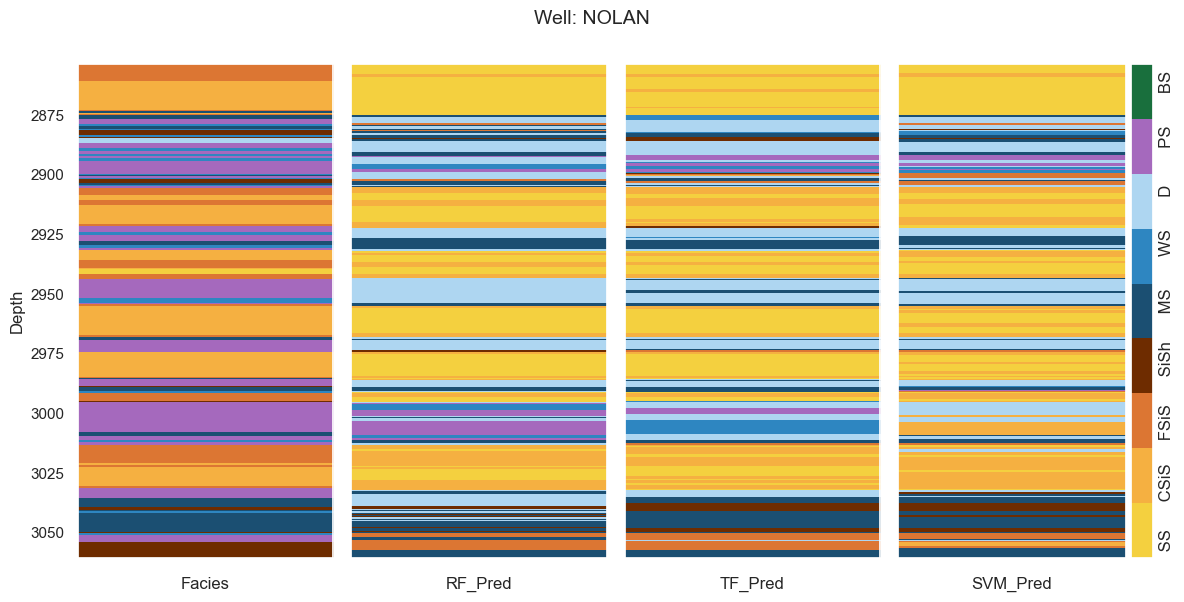

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

def compare_facies_predictions(logs, Pred1, Pred2, Pred3, facies_colors):
    unique_wells = logs['Well Name'].unique()
    
    for well_name in unique_wells:
        logs_well = logs[logs['Well Name'] == well_name]
        logs_well = logs_well.sort_values(by='Depth')
        
        cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')

        ztop = logs_well.Depth.min()
        zbot = logs_well.Depth.max()

        cluster_facies = np.repeat(np.expand_dims(logs_well['Facies'].values, 1), 100, 1)
        cluster_rf_pred = np.repeat(np.expand_dims(logs_well[Pred1].values, 1), 100, 1)
        cluster_tf_pred = np.repeat(np.expand_dims(logs_well[Pred2].values, 1), 100, 1)
        cluster_svm_pred = np.repeat(np.expand_dims(logs_well[Pred3].values, 1), 100, 1)

        fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

        im_facies = axs[0].imshow(cluster_facies, interpolation='none', cmap=cmap_facies, aspect='auto', extent=[0, 1, zbot, ztop], vmin=1, vmax=9)
        im_rf_pred = axs[1].imshow(cluster_rf_pred, interpolation='none', cmap=cmap_facies, aspect='auto', extent=[0, 1, zbot, ztop], vmin=1, vmax=9)
        im_tf_pred = axs[2].imshow(cluster_tf_pred, interpolation='none', cmap=cmap_facies, aspect='auto', extent=[0, 1, zbot, ztop], vmin=1, vmax=9)
        im_svm_pred = axs[3].imshow(cluster_svm_pred, interpolation='none', cmap=cmap_facies, aspect='auto', extent=[0, 1, zbot, ztop], vmin=1, vmax=9)

        #dividers = [make_axes_locatable(ax) for ax in axs]
        #caxes = [divider.append_axes("right", size="5%", pad=0.05) for divider in dividers]
    
        #cbar_facies = plt.colorbar(im_facies, cax=caxes[0], ticks=range(1, 10))
        #cbar_facies.set_label('Facies')
        
        #cbar_rf_pred = plt.colorbar(im_rf_pred, cax=caxes[1], ticks=range(1, 10))
        #cbar_rf_pred.set_label(Pred1)
        
        #cbar_tf_pred = plt.colorbar(im_tf_pred, cax=caxes[2], ticks=range(1, 10))
        #cbar_tf_pred.set_label(Pred2)

        divider = make_axes_locatable(axs[3])
        cax = divider.append_axes("right", size="10%", pad=0.05)
        cbar = plt.colorbar(im_svm_pred, cax=cax)
        cbar.set_ticks([])
        cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', ' SiSh', ' MS ', ' WS ', ' D  ', ' PS ', ' BS ']))
        

        for i in range(len(axs)):
            axs[i].set_ylim(ztop, zbot)
            axs[i].invert_yaxis()
            axs[i].grid()
            axs[i].locator_params(axis='x', nbins=3)
            axs[i].set_xlabel(logs_well.columns[i + 4])
            axs[i].set_xticklabels([])  

        axs[0].set_xlabel('Facies')
        axs[1].set_xlabel(Pred1)
        axs[2].set_xlabel(Pred2)
        axs[3].set_xlabel(Pred3)

        axs[0].set_ylabel('Depth')

        for i in range(1, len(axs)):
            axs[i].set_yticklabels([])

        fig.suptitle('Well: %s' % well_name, fontsize=14, y=1)
        plt.tight_layout()
        plt.show()

compare_facies_predictions(well_test, 'RF_Pred', 'TF_Pred', 'SVM_Pred', facies_colors)
